# Import necessary dependencies and settings

In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

# Image metadata features

 - Image create date & time
 - Image dimensions
 - Image compression format
 - Device Make & Model
 - Image resolution & aspect ratio
 - Image Artist
 - Flash, Aperture, Focal Length & Exposure

# Raw Image and channel pixel values

In [2]:
cat = io.imread('datasets/cat.png')
dog = io.imread('datasets/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])


print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


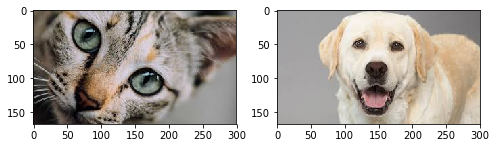

In [3]:
#coffee = skimage.transform.resize(coffee, (300, 451), mode='reflect')
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog)

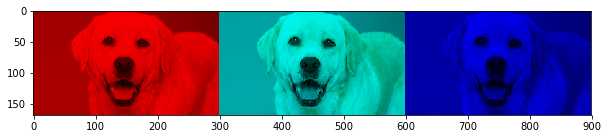

In [4]:
dog_r = dog.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0
dog_g = dog.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0
dog_b = dog.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [5]:
dog_r

array([[[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       ..., 
       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ..., 
        [212,   0,   0],
        [211,   0,   0],
        [210,   0,   0]],

       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ..., 
        [210,   0,   0],
        [210,   0,   0],
        [209,   0,   0]],

       [[164,   0,   0],
        [164,   0,   0],
        [164,   0,   0],
        ..., 
        [209,   0,   0],
        [209,   0,   0],
        [209,   0,

# Grayscale image pixel values

In [6]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300) 

2D image pixel map
[[ 0.42  0.41  0.41 ...,  0.5   0.52  0.53]
 [ 0.41  0.41  0.4  ...,  0.51  0.52  0.54]
 [ 0.4   0.4   0.4  ...,  0.52  0.54  0.55]
 ..., 
 [ 0.11  0.11  0.1  ...,  0.51  0.51  0.51]
 [ 0.11  0.11  0.1  ...,  0.51  0.51  0.51]
 [ 0.11  0.11  0.1  ...,  0.51  0.51  0.51]] 

Flattened pixel map: [ 0.42  0.41  0.41 ...,  0.51  0.51  0.51]


# Binning image intensity distribution

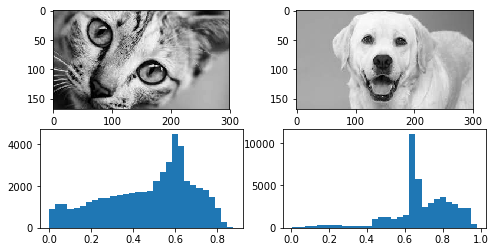

In [7]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

# Image aggregation statistics

## RGB ranges

In [8]:
from scipy.stats import describe

cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T

cs = describe(cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)

cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


# Descriptive aggregations

In [9]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


# Edge detection

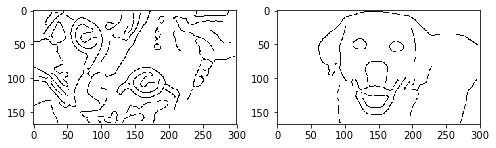

In [10]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')

# Object detection 

C:\Program Files\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


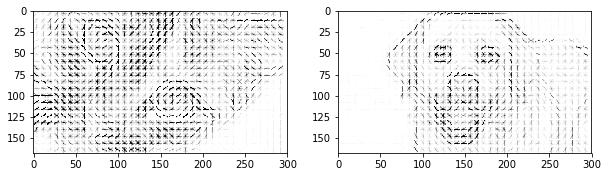

In [11]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hogs, cmap='binary')

In [12]:
print(fd_cat, fd_cat.shape)

[ 0.00288784  0.00301086  0.0255757  ...,  0.          0.          0.        ] (47880,)


# Localized feature extraction


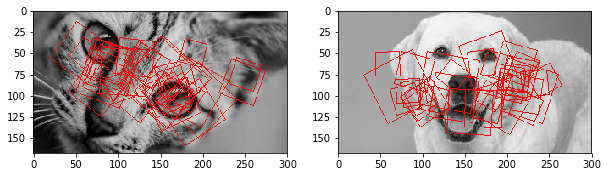

In [13]:
from mahotas.features import surf
import mahotas as mh

cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dog)

cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

In [14]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
cat_surf_fds.shape

(140, 64)

# Visual Bag of Words model

## Engineering features from SURF feature descriptions with clustering

In [15]:
from sklearn.cluster import KMeans

k = 20
km = KMeans(k, n_init=100, max_iter=100)

surf_fd_features = np.array([cat_surf_fds, dog_surf_fds])
km.fit(np.concatenate(surf_fd_features))

vbow_features = []
for feature_desc in surf_fd_features:
    labels = km.predict(feature_desc)
    vbow = np.bincount(labels, minlength=k)
    vbow_features.append(vbow)

vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Cat,8,16,11,7,3,0,16,6,0,...,0,13,1,0,1,15,10,2,14,2
1,Dog,3,10,6,16,9,16,9,5,3,...,2,10,3,2,3,7,7,6,7,2


## Trying out the VBOW pipeline on a new image

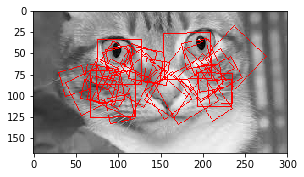

In [16]:
new_cat = io.imread('datasets/new_cat.png')
newcat_mh = mh.colors.rgb2gray(new_cat)
newcat_surf = surf.surf(newcat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(newcat_mh, newcat_surf))

In [17]:
new_surf_fds = surf.dense(newcat_mh, spacing=10)

labels = km.predict(new_surf_fds)
new_vbow = np.bincount(labels, minlength=k)
pd.DataFrame([new_vbow])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9,5,11,0,9,4,19,9,0,16,0,7,3,0,0,7,20,3,16,2


In [18]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

eucdis = euclidean_distances(new_vbow.reshape(1,-1) , vbow_features)
cossim = cosine_similarity(new_vbow.reshape(1,-1) , vbow_features)

result_df = pd.DataFrame({'EuclideanDistance': eucdis[0],
              'CosineSimilarity': cossim[0]})
pd.concat([df, result_df], axis=1)

,Image,CosineSimilarity,EuclideanDistance
0,Cat,0.871609,21.260292
1,Dog,0.722096,30.000000


# Automated Feature Engineering with Deep Learning

In [19]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## Build a basic 2-layer CNN

In [55]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(168, 300, 3), activation='relu', 
                 kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu', 
                kernel_initializer='glorot_uniform'))

## Visualize the CNN architecture

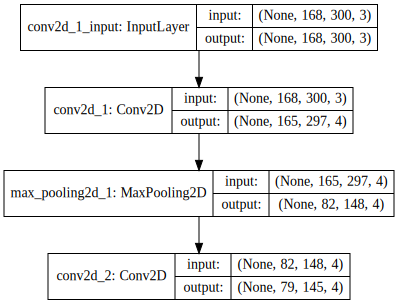

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

## Build functions to extract features from intermediate layers

In [56]:
first_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                              [model.layers[0].output])
second_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                               [model.layers[2].output])

## Extract and visualize image representation features

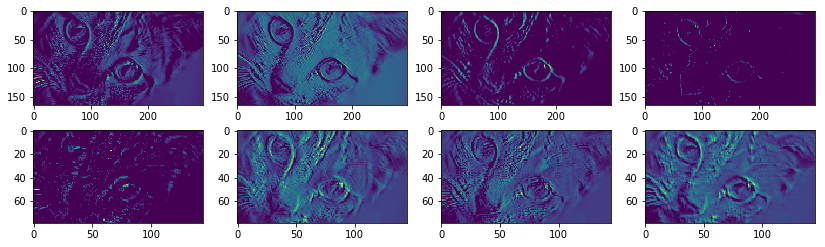

In [57]:
catr = cat.reshape(1, 168, 300,3)

# extract feaures 
first_conv_features = first_conv_layer([catr])[0][0]
second_conv_features = second_conv_layer([catr])[0][0]

# view feature representations
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(2,4, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(2,4, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(2,4, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(2,4, 4)
ax4.imshow(first_conv_features[:,:,3])

ax5 = fig.add_subplot(2,4, 5)
ax5.imshow(second_conv_features[:,:,0])
ax6 = fig.add_subplot(2,4, 6)
ax6.imshow(second_conv_features[:,:,1])
ax7 = fig.add_subplot(2,4, 7)
ax7.imshow(second_conv_features[:,:,2])
ax8 = fig.add_subplot(2,4, 8)
ax8.imshow(second_conv_features[:,:,3])

In [60]:
sample_features = np.round(np.array(first_conv_features[:,:,1], dtype='float'), 2)
print(sample_features)
print(sample_features.shape)

[[ 26.05  25.48  24.85 ...,  37.35  37.38  36.5 ]
 [ 25.8   25.19  25.13 ...,  37.7   38.58  36.08]
 [ 25.32  24.85  24.5  ...,  36.8   36.68  35.23]
 ..., 
 [  4.47   3.31   3.72 ...,  31.74  31.64  32.5 ]
 [  4.01   4.24   3.02 ...,  31.74  31.64  32.5 ]
 [  4.67   3.53   3.68 ...,  31.74  31.64  32.5 ]]
(165, 297)
